In [1]:
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

/var/folders/pp/vx5jj9zd7md0cjm89ylb1z840000gn/T/ipykernel_14423/4021885342.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
for fh in os.listdir(f"issue-history/"):
    print(fh)

92_github-issues_symfony--symfony_2022-08-03.json
66_github-issues_facebook--react-native_2022-07-29.json
48_github-issues_vuetifyjs--vuetify_2022-07-27.json
83_github-issues_influxdata--influxdb_2022-07-31.json
22_github-issues_tensorflow--tensorflow_2022-07-24.json
27_github-issues_eclipse--sumo_2022-07-25.json
63_github-issues_ampproject--amphtml_2022-07-29.json
29_github-issues_azure--azure-cli_2022-07-25.json
10_github-issues_powershell--powershell_2022-07-23.json
31_github-issues_saltstack--salt_2022-07-25.json
7_github-issues_hashicorp--terraform-provider-aws_2022-08-03.json
89_github-issues_laravel--framework_2022-08-03.json
3_github-issues_eclipse--che_2022-07-23.json
46_github-issues_angular--components_2022-07-27.json
69_github-issues_twbs--bootstrap_2022-07-29.json
55_github-issues_fortawesome--font-awesome_2022-07-28.json
70_github-issues_microsoft--vscode_2022-07-29.json
64_github-issues_wordpress--gutenberg_2022-07-29.json
12_github-issues_golang--go_2022-08-03.json
61_g

In [3]:
def getName(x):
    try: 
        return x[0]["name"]
    except:
        return "None"

In [4]:
bigdf = []
names = []
means = []
counts = []

for fh in os.listdir(f"issue-history/"):
    print(fh)

    try:
        # Opening JSON file
        f = open("issue-history/" + fh)


        data = []
        for line in f:
            data.append(json.loads(line))

        df = pd.DataFrame.from_records(data)
        df = df[df["state"] == "closed"]
        df["opened"] = pd.to_datetime(df["created_at"])
        df["closed"] = pd.to_datetime(df["closed_at"])
        df["timetoclose"] = df["closed"] - df["opened"]
        df["tags"] = df["labels"].apply(getName)

        parsed = pd.DataFrame(columns=['Column 1', 'Column 2', 'Column 3'])

        newdf = []

        bins = df.resample('QE', on='opened')["timetoclose"]
        for key, binRows in bins.indices.items():
            bindf = df.iloc[binRows]
            bindf["quarter"] = key

            newdf.append(bindf[['repository_url', 'opened', 'closed', "timetoclose", "quarter", "tags"]])

        newdf = pd.concat(newdf)
        bigdf.append(newdf)
        means.append(bins.mean().rename(newdf['repository_url'].iloc[0]).rename_axis(None))
        counts.append(bins.count().rename(newdf['repository_url'].iloc[0]).rename_axis(None))
    except:
        print(fh + " is empty!")

bigdf = pd.concat(bigdf)

92_github-issues_symfony--symfony_2022-08-03.json
66_github-issues_facebook--react-native_2022-07-29.json
48_github-issues_vuetifyjs--vuetify_2022-07-27.json
83_github-issues_influxdata--influxdb_2022-07-31.json
22_github-issues_tensorflow--tensorflow_2022-07-24.json
27_github-issues_eclipse--sumo_2022-07-25.json
63_github-issues_ampproject--amphtml_2022-07-29.json
29_github-issues_azure--azure-cli_2022-07-25.json
10_github-issues_powershell--powershell_2022-07-23.json
31_github-issues_saltstack--salt_2022-07-25.json
7_github-issues_hashicorp--terraform-provider-aws_2022-08-03.json
89_github-issues_laravel--framework_2022-08-03.json
3_github-issues_eclipse--che_2022-07-23.json
46_github-issues_angular--components_2022-07-27.json
69_github-issues_twbs--bootstrap_2022-07-29.json
55_github-issues_fortawesome--font-awesome_2022-07-28.json
70_github-issues_microsoft--vscode_2022-07-29.json
64_github-issues_wordpress--gutenberg_2022-07-29.json
12_github-issues_golang--go_2022-08-03.json
61_g

In [5]:
bigdf.to_csv('githubData.csv')
len(bigdf['repository_url'].unique())
bigdf

,repository_url,opened,closed,timetoclose,quarter
0,https://api.github.com/repos/symfony/symfony,2015-01-03 13:49:21+00:00,2015-01-04 14:28:51+00:00,1 days 00:39:30,2015-03-31 00:00:00+00:00
1,https://api.github.com/repos/symfony/symfony,2015-01-02 15:42:04+00:00,2015-01-04 16:49:45+00:00,2 days 01:07:41,2015-03-31 00:00:00+00:00
2,https://api.github.com/repos/symfony/symfony,2015-01-05 15:38:33+00:00,2015-01-05 17:51:38+00:00,0 days 02:13:05,2015-03-31 00:00:00+00:00
3,https://api.github.com/repos/symfony/symfony,2015-01-06 09:45:56+00:00,2015-01-06 09:59:14+00:00,0 days 00:13:18,2015-03-31 00:00:00+00:00
4,https://api.github.com/repos/symfony/symfony,2015-01-01 20:09:38+00:00,2015-01-06 12:55:23+00:00,4 days 16:45:45,2015-03-31 00:00:00+00:00
...,...,...,...,...,...
7064,https://api.github.com/repos/woocommerce/wooco...,2016-11-05 15:02:02+00:00,2017-02-02 08:30:54+00:00,88 days 17:28:52,2017-12-31 00:00:00+00:00
7065,https://api.github.com/repos/woocommerce/wooco...,2017-12-15 23:26:34+00:00,2017-12-18 10:58:11+00:00,2 days 11:31:37,2017-12-31 00:00:00+00:00
7066,https://api.github.com/repos/woocommerce/wooco...,2015-04-27 01:40:56+00:00,2015-06-16 14:12:13+00:00,50 days 12:31:17,2017-12-31 00:00:00+00:00
7067,https://api.github.com/repos/woocommerce/wooco...,2017-01-19 14:08:26+00:00,2017-01-23 11:56:47+00:00,3 days 21:48:21,2017-12-31 00:00:00+00:00


In [6]:
meansdf = pd.concat(means, axis=1)
meansdf.to_csv("githubMeans.csv")
meansdf

,https://api.github.com/repos/symfony/symfony,https://api.github.com/repos/facebook/react-native,https://api.github.com/repos/vuetifyjs/vuetify,https://api.github.com/repos/influxdata/influxdb,https://api.github.com/repos/tensorflow/tensorflow,https://api.github.com/repos/eclipse/sumo,https://api.github.com/repos/ampproject/amphtml,https://api.github.com/repos/Azure/azure-cli,https://api.github.com/repos/PowerShell/PowerShell,https://api.github.com/repos/saltstack/salt,...,https://api.github.com/repos/numpy/numpy,https://api.github.com/repos/dotnet/sdk,https://api.github.com/repos/gatsbyjs/gatsby,https://api.github.com/repos/mrdoob/three.js,https://api.github.com/repos/microsoft/terminal,https://api.github.com/repos/angular/angular,https://api.github.com/repos/elastic/elasticsearch,https://api.github.com/repos/ClickHouse/ClickHouse,https://api.github.com/repos/rancher/rancher,https://api.github.com/repos/woocommerce/woocommerce
2015-03-31 00:00:00+00:00,203 days 15:58:07.073170732,64 days 07:57:00.898461538,NaT,79 days 04:44:14.987244898,NaT,1043 days 07:00:52.024844720,NaT,NaT,NaT,392 days 20:44:27.853238864,...,663 days 10:00:35.306569336,NaT,NaT,288 days 08:24:09.490272376,NaT,109 days 19:57:48.797468354,142 days 09:52:38.871830986,NaT,145 days 05:42:02.690909090,6 days 17:21:29.977272727
2015-06-30 00:00:00+00:00,184 days 22:44:20.721052632,70 days 22:49:19.705368290,NaT,52 days 17:18:41.692844677,NaT,988 days 16:51:59.183673472,NaT,NaT,NaT,394 days 08:24:57.065839696,...,618 days 08:25:34.321739136,NaT,178 days 23:06:56,243 days 18:12:14.632034632,NaT,91 days 21:25:06.545006165,157 days 01:34:44.262251654,NaT,105 days 17:28:52.629834254,9 days 08:10:26.740384615
2015-09-30 00:00:00+00:00,160 days 15:20:08.274566476,78 days 17:08:06.926940639,NaT,96 days 10:09:26.399693722,NaT,852 days 15:24:15.226415088,56 days 02:39:16.968253968,NaT,NaT,347 days 13:20:50.642857144,...,583 days 22:35:47.823076920,NaT,213 days 02:35:43.275862068,250 days 05:37:19.087301588,NaT,107 days 13:18:49.770880360,143 days 17:55:24.865979382,NaT,147 days 10:20:13.503152586,6 days 16:40:44.050751879
2015-12-31 00:00:00+00:00,124 days 14:27:06.534675614,68 days 03:07:22.644357977,NaT,158 days 06:08:53.321799308,94 days 22:07:27.890410959,835 days 08:15:22.539215696,131 days 13:38:30.492211838,NaT,NaT,352 days 22:53:42.909090912,...,393 days 04:19:17.389189188,1527 days 10:13:42.712589072,122 days 11:30:16.880000,188 days 06:37:27.225308640,NaT,130 days 16:06:58.493779906,139 days 08:50:10.931537598,NaT,136 days 00:19:28.948312236,4 days 17:08:11.304347826
2016-03-31 00:00:00+00:00,130 days 04:33:13.120204604,80 days 03:47:15.972943723,NaT,145 days 04:17:30.637735850,74 days 04:59:18.563356164,708 days 13:06:51.126050424,136 days 05:56:28.269413630,124 days 12:18:19.285714286,38 days 11:30:40.693843594,338 days 05:31:05.368944100,...,547 days 16:23:06.733009712,1445 days 03:58:49.330891344,99 days 05:30:19.082352941,189 days 08:22:03.323333332,NaT,164 days 07:09:05.511532126,144 days 12:27:05.456209148,NaT,126 days 02:09:40.635773864,7 days 03:45:05.840646651
2016-06-30 00:00:00+00:00,126 days 00:48:23.527439024,98 days 05:58:30.759139785,NaT,175 days 17:18:45.642458100,73 days 04:42:59.073760580,721 days 21:46:32.875675672,146 days 08:54:15.693045564,80 days 12:31:42.312500,134 days 06:37:52.952380952,325 days 00:32:18.841133004,...,440 days 03:12:20.637795272,1360 days 13:06:05.638297872,123 days 22:56:26.100000,218 days 14:56:01.623595504,NaT,95 days 09:12:50.019700552,122 days 17:49:16.440277778,347 days 18:12:43.388888888,139 days 15:30:50.254106280,12 days 05:21:20.122950819
2016-09-30 00:00:00+00:00,142 days 07:16:45.848297214,90 days 17:17:51.795362903,NaT,208 days 16:18:50.522448980,70 days 21:08:32.482690406,615 days 20:17:15.095890408,188 days 00:10:17.093645486,113 days 11:00:02.809859154,192 days 21:18:11.438697318,307 days 04:41:19.279799244,...,294 days 04:27:55.609756096,1035 days 10:35:46.751789968,192 days 21:19:52.812500,188 days 10:

In [7]:
countsdf = pd.concat(counts, axis=1)
countsdf.to_csv("githubCounts.csv")
countsdf

,https://api.github.com/repos/symfony/symfony,https://api.github.com/repos/facebook/react-native,https://api.github.com/repos/vuetifyjs/vuetify,https://api.github.com/repos/influxdata/influxdb,https://api.github.com/repos/tensorflow/tensorflow,https://api.github.com/repos/eclipse/sumo,https://api.github.com/repos/ampproject/amphtml,https://api.github.com/repos/Azure/azure-cli,https://api.github.com/repos/PowerShell/PowerShell,https://api.github.com/repos/saltstack/salt,...,https://api.github.com/repos/numpy/numpy,https://api.github.com/repos/dotnet/sdk,https://api.github.com/repos/gatsbyjs/gatsby,https://api.github.com/repos/mrdoob/three.js,https://api.github.com/repos/microsoft/terminal,https://api.github.com/repos/angular/angular,https://api.github.com/repos/elastic/elasticsearch,https://api.github.com/repos/ClickHouse/ClickHouse,https://api.github.com/repos/rancher/rancher,https://api.github.com/repos/woocommerce/woocommerce
2015-03-31 00:00:00+00:00,328,325,NaN,392,NaN,161,NaN,NaN,NaN,988,...,137,NaN,NaN,257,NaN,395,710,NaN,330,572
2015-06-30 00:00:00+00:00,380,801,NaN,573,NaN,98,NaN,NaN,NaN,1048,...,115,NaN,8.0,231,NaN,811,755,NaN,905,416
2015-09-30 00:00:00+00:00,346,876,NaN,653,NaN,106,189.0,NaN,NaN,994,...,130,NaN,29.0,252,NaN,886,873,NaN,793,532
2015-12-31 00:00:00+00:00,447,1285,NaN,578,584.0,102,321.0,NaN,NaN,1067,...,185,421.0,25.0,324,NaN,1045,891,NaN,948,460
2016-03-31 00:00:00+00:00,391,924,NaN,530,584.0,119,631.0,7.0,601.0,805,...,206,819.0,85.0,300,NaN,1214,765,NaN,1079,433
2016-06-30 00:00:00+00:00,328,930,NaN,358,827.0,185,417.0,160.0,210.0,812,...,127,987.0,50.0,356,NaN,1269,720,18.0,1035,488
2016-09-30 00:00:00+00:00,323,992,NaN,245,1011.0,73,598.0,284.0,522.0,797,...,123,419.0,80.0,284,NaN,1537,693,44.0,783,445
2016-12-31 00:00:00+00:00,341,909,51.0,222,1139.0,155,604.0,341.0,268.0,662,...,133,740.0,75.0,272,NaN,1119,780,70.0,1120,455
2017-03-31 00:00:00+00:00,393,963,204.0,287,1502.0,196,695.0,486.0,257.0,766,...,169,844.0,62.0,250,NaN,1157,722,92.0,1117,657
2017-06-30 00:00:00+00:00,389,1061,437.0,184,1338.0,214,661.0,502.0,328.0,578,...,168,548.0,194.0,238,NaN,1292,713,96.0,807,1254


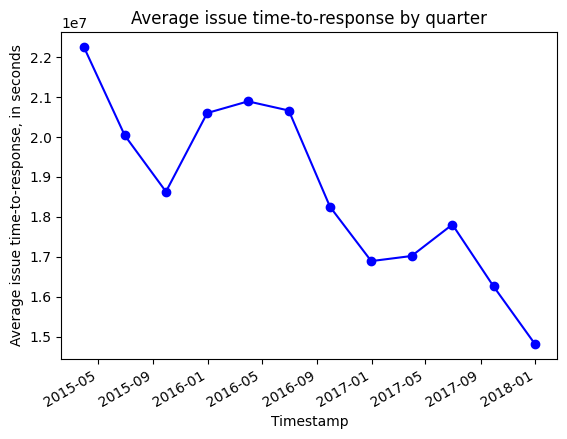

In [8]:
bigdf["ttc"] = bigdf["timetoclose"].dt.total_seconds() 
a = bigdf.resample('QE', on='opened')["ttc"]

# Plot the data
plt.plot(a.mean().rename_axis(None), marker='o', linestyle='-', color='b')
plt.gcf().autofmt_xdate()

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Average issue time-to-response, in seconds')
plt.title('Average issue time-to-response by quarter')
plt.show()